In [1]:
import warnings

# Desactivar todos los warnings
warnings.filterwarnings("ignore")

In [19]:
import os
import csv
import random

import mne
import time
import utils as u
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from scipy.signal import find_peaks



### Microstate Computation - Group-level analysis from individual clusters

In [ ]:
import mne

# Recording time required for the preprocessing
t = time.time()

# Lista de nombres de pacientes
lista_pacientes = ['sub-010002'] #, 'sub-010003', 'sub-010004', 'sub-010005', 'sub-010006']

# Carpeta donde se encuentran los archivos de EEG
DATA_FOLDER = 'E:\DATA_FOLDER'

# Lista para almacenar los centros de los clusters
individual_cluster_centers = []

# Iterar sobre la lista de pacientes
for paciente in lista_pacientes:
    # Ruta al archivo de EEG del paciente actual
    ruta_archivo = f"{DATA_FOLDER}/{paciente}/RSEEG/{paciente}.vhdr"
    
    # Cargar los datos EEG del paciente actual
    raw = mne.io.read_raw_brainvision(ruta_archivo, eog=('VEOG',), preload=True, misc='auto', scale=1, verbose=None)
    
    # preproceso
    cleaned_eeg = u.preprocessing(raw, sf=None)

    # extract GFP peaks
    gfp_peaks = extract_gfp_peaks(cleaned_eeg)
    # subject level clustering
    
    ModK = ModKMeans(n_clusters=4, random_state=42)
    ModK.fit(gfp_peaks, n_jobs=2)
    individual_cluster_centers.append(ModK.cluster_centers_)

group_cluster_centers = np.vstack(individual_cluster_centers).T
group_cluster_centers = ChData(group_cluster_centers, ModK.info)

# group level clustering
ModK = ModKMeans(n_clusters=4, random_state=42)
ModK.fit(group_cluster_centers, n_jobs=2)

print('Tiempo de preprocesado', time.time() - t)

In [ ]:
ModK

In [ ]:
ModK.reorder_clusters(order=[1, 2, 0])
ModK.rename_clusters(new_names=["AB", "C", "D"])

In [ ]:
ModK.plot()
plt.show()

In [ ]:
# Save
with open('microstates.pickle', 'wb') as f:
    pickle.dump(ModK, f)

In [ ]:
# Load
with open('microstates.pickle', 'rb') as f:
    km = pickle.load(f)

## Microstate Preprocessing

### Paths

In [3]:
# Define the path to the main data folder where the raw eeg can be found
DATA_FOLDER = 'E:\DATA_FOLDER'

# Define the path to the main folder where the microstate data will be stored
MICROSTATES = 'E:\MICROSTATES'
# Crear la carpeta para el paciente en la carpeta de destino
os.makedirs(MICROSTATES, exist_ok=True)

### Load microstate model

In [4]:
# Open the pickle file
with open(r"E:\M4_2500.pickle", 'rb') as file:
    ModK = pickle.load(file)

### EEG

In [35]:
t = time.time()
raw = mne.io.read_raw_brainvision(r'C:\Users\enriq\Anaconda\CSIC\sub-010203\sub-010203.vhdr', eog=('VEOG',), preload=True, misc='auto', scale=1, verbose=None)
events, event_dict = mne.events_from_annotations(raw)

Extracting parameters from C:\Users\enriq\Anaconda\CSIC\sub-010203\sub-010203.vhdr...
Setting channel info structure...
Reading 0 ... 2643199  =      0.000 ...  1057.280 secs...


In [36]:
for i in events:
    print(i)

In [30]:
t = time.time()
raw = mne.io.read_raw_brainvision('E:\DATA_FOLDER\sub-010285\RSEEG\sub-010285.vhdr', eog=('VEOG',), preload=True, misc='auto', scale=1, verbose=None)
events, event_dict = mne.events_from_annotations(raw)

Extracting parameters from E:\DATA_FOLDER\sub-010285\RSEEG\sub-010285.vhdr...
Setting channel info structure...
Reading 0 ... 200249  =      0.000 ...    80.100 secs...
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/']


In [31]:
for i in events:
    print(i)

[    0     0 99999]
[    0     0 10001]


In [5]:
t = time.time()
raw = mne.io.read_raw_brainvision('E:\DATA_FOLDER\sub-010126\RSEEG\sub-010126.vhdr', eog=('VEOG',), preload=True, misc='auto', scale=1, verbose=None)
events, event_dict = mne.events_from_annotations(raw)

Extracting parameters from E:\DATA_FOLDER\sub-010126\RSEEG\sub-010126.vhdr...
Setting channel info structure...
Reading 0 ... 2640099  =      0.000 ...  1056.040 secs...
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S200', 'Stimulus/S208']


In [38]:
for i in events:
    print(i)

[    0     0 99999]
[    0     0 10001]
[16928     0   208]
[21928     0   208]
[26929     0   208]
[31929     0   208]
[36929     0   208]
[41929     0   208]
[46929     0   208]
[51929     0   208]
[56929     0   208]
[61930     0   208]
[66930     0   208]
[71930     0   208]
[76930     0   208]
[81930     0   208]
[86930     0   208]
[91931     0   208]
[96931     0   208]
[101931      0    208]
[106931      0    208]
[111931      0    208]
[116931      0    208]
[121932      0    208]
[126932      0    208]
[131932      0    208]
[136932      0    208]
[141932      0    208]
[146932      0    208]
[151932      0    208]
[156933      0    208]
[161933      0    208]
[172423      0    200]
[177423      0    200]
[182423      0    200]
[187423      0    200]
[192423      0    200]
[197424      0    200]
[202424      0    200]
[207424      0    200]
[212424      0    200]
[217424      0    200]
[222424      0    200]
[227425      0    200]
[232425      0    200]
[237425      0    200]

In [6]:
cleaned_eeg = u.preprocessing(raw, sf=None)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Using EOG channel: VEOG
EOG channel index for this subject is: [16]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Selecting channel VEOG for blink detection
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 20.25 Hz)
- Filter length: 25000 samples (10.000 s)

Now detecting blinks and generating corresponding events


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Found 232 significant peaks
Number of EOG events detected: 232
Not setting metadata
232 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 232 events and 2501 original time points ...
1 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 51.2s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 3 ICA components
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


In [7]:
# Dictionary with data
d = u.dictionary(cleaned_eeg)

Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S200', 'Stimulus/S208']


In [8]:
# Samples
start_samples_ce, start_samples_oe, end_samples_ce, end_samples_oe = u.segment_samples(d)

In [9]:
print("Start samples de eventos EYES CLOSED:", start_samples_ce)
print("Start samples de eventos EYES OPENED:", start_samples_oe)
print("-----------------------------------------")
print("End samples de eventos EYES CLOSED:", end_samples_ce)
print("End samples de eventos EYES OPENED:", end_samples_oe)

Start samples de eventos EYES CLOSED: [16928, 327830, 638244, 953596, 1310736, 1696131, 2010205, 2321667]
Start samples de eventos EYES OPENED: [172423, 482897, 794911, 1109423, 1466881, 1852148, 2165420, 2483183]
-----------------------------------------
End samples de eventos EYES CLOSED: [172423, 482897, 794911, 1109423, 1466881, 1852148, 2165420, 2483183]
End samples de eventos EYES OPENED: [327830, 638244, 953596, 1310736, 1696131, 2010205, 2321667, 2628188]


In [24]:
print("Start samples de eventos EYES CLOSED:", start_samples_ce)
print("Start samples de eventos EYES OPENED:", start_samples_oe)
print("-----------------------------------------")
print("End samples de eventos EYES CLOSED:", end_samples_ce)
print("End samples de eventos EYES OPENED:", end_samples_oe)

Start samples de eventos EYES CLOSED: []
Start samples de eventos EYES OPENED: [172423, 482897, 794911, 1109423, 1466881, 1852148, 2165420, 2483183]
-----------------------------------------
End samples de eventos EYES CLOSED: []
End samples de eventos EYES OPENED: [327830, 638244, 953596, 1310736, 1696131, 2010205, 2321667, 2628188]


In [14]:
# Emparejar las listas de start y end samples
pairs_ce = list(zip(start_samples_ce, end_samples_ce))
pairs_oe = list(zip(start_samples_oe, end_samples_oe))

# Unir las parejas correspondientes y ordenarlas en orden ascendente
pairs = sorted(pairs_ce + pairs_oe)

# Imprimir las parejas ordenadas
print("Parejas ordenadas de start y end samples:")
for pair in pairs:
    print(pair)

Parejas ordenadas de start y end samples:
(16928, 172423)
(172423, 327830)
(327830, 482897)
(482897, 638244)
(638244, 794911)
(794911, 953596)
(953596, 1109423)
(1109423, 1310736)
(1310736, 1466881)
(1466881, 1696131)
(1696131, 1852148)
(1852148, 2010205)
(2010205, 2165420)
(2165420, 2321667)
(2321667, 2483183)
(2483183, 2628188)


### Microstates computation

In [10]:
# Compute gfp
gfp = np.std(cleaned_eeg.get_data(), axis=0)

# Identify gfp peaks
peaks, _ = find_peaks(gfp)
print(f"There are {len(peaks)} peaks")

# Identigy gfp valleys
valleys, _ = list(find_peaks(-gfp))
print(f"There are {len(valleys)} valleys")

There are 21063 peaks
There are 21062 valleys


In [11]:
# Compute the prediction of the microstates
segmentation = ModK.predict(
    cleaned_eeg,
    reject_by_annotation=True,
    factor=10,
    half_window_size=10,
    min_segment_length=5,
    reject_edges=True,
)

# Get the list of microstates
microstates = segmentation.labels[peaks]

In [12]:
np.unique(microstates)

array([0, 1, 2, 3])

In [17]:
# Keep those segmentation values that correspond to the gfp peaks
microstates = segmentation.labels[peaks]

# Create a list to store each microstates with the change index, duration and event
data = []

# Store last microstate change
last_change = 0

# Store each event
event = 0

# Loop over the microstate list to compute each parameter
for i in range(0, len(microstates)-1):
    
    if microstates[i] != microstates[i + 1]:
        #print(i, valleys[i])
        # Change the segmentation label by the corresponding microstate
        if microstates[i] == 0:
            microstate = 'A'
        elif microstates[i] == 1:
            microstate = 'B'
        elif microstates[i] == 2:
            microstate = 'C'
        elif microstates[i] == 3:
            microstate = 'D'
        else:
            microstate = 'E'

        
        # Verificar en qué rango de eventos está el índice actual
        event = 0
        for j, (start_ce, end_ce) in enumerate(pairs, start=1):
            if start_ce <= peaks[i] <= end_ce:
                event = j
                break
     
        data.append([microstate, valleys[i], event])

        # Actualizar el índice del último cambio
        last_change = valleys[i]

# Encabezados
headers = ['microstate', 'index', 'event']

# Nombre del archivo CSV
file_name = 'sub-010126_microstate.csv'

# Escribir datos en el archivo CSV
with open(file_name, 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile, delimiter=';')
    #csv_writer.writerow(microstates)
    csv_writer.writerow(headers)  # Escribir encabezados
    csv_writer.writerows(data)

print("Archivo CSV creado exitosamente.")

Archivo CSV creado exitosamente.


1 325
2 394
3 513
4 582
5 700
6 760
7 874
9 1109
10 1161
11 1253
15 1571
16 1612
17 1696
18 1766
20 1902
22 2215
23 2359
27 2814
28 3014
29 3114
30 3255
31 3386
32 3452
33 3579
36 3862
37 3986
38 4033
42 4561
43 4602
44 4734
45 4809
49 5211
50 5288
52 5474
54 5691
55 5832
57 5999
58 6073
59 6209
61 6354
63 6537
64 6673
65 6741
66 6856
67 7019
71 7364
72 7494
73 7592
74 7665
75 7741
76 7814
77 7906
78 7980
79 8104
80 8212
81 8315
82 8459
84 8605
86 8885
88 9017
89 9154
91 9303
92 9398
95 9899
96 10020
97 10127
98 10192
99 10260
100 10314
102 10457
103 10573
104 10658
105 10751
108 11171
109 11253
111 11432
112 11539
113 11633
114 11784
115 11884
118 12203
119 12362
121 12619
122 12664
124 13025
125 13355
128 13647
129 13723
130 13821
131 13885
132 14056
133 14133
134 14268
135 14354
136 14451
137 14592
138 14666
140 14880
141 14946
142 15035
144 15340
145 15437
146 15508
150 15776
151 15900
153 16035
154 16150
158 16513
159 16606
160 16684
162 16829
163 16904
166 17201
167 17290
169 174

PermissionError: [Errno 13] Permission denied: 'datos2.csv'

In [97]:
microstates[150]

0

In [93]:
microstates[151]

1

In [95]:
microstates[152]

1

In [96]:
valleys[152]

15953

In [91]:
microstates[153]

0

In [92]:
microstates[186]

1

In [87]:
microstates[187]

0

In [89]:
len(peaks)

27686

In [90]:
len(microstates)

27686

In [36]:
16035 - 15885

150

In [50]:
cleaned_eeg.times[16035]

6.414

In [47]:
len(cleaned_eeg.times[15885:16186])

301

In [67]:
len(cleaned_eeg.times[16035-13:16035+13])

26

In [47]:
len(cleaned_eeg.times[15885:16186])

301

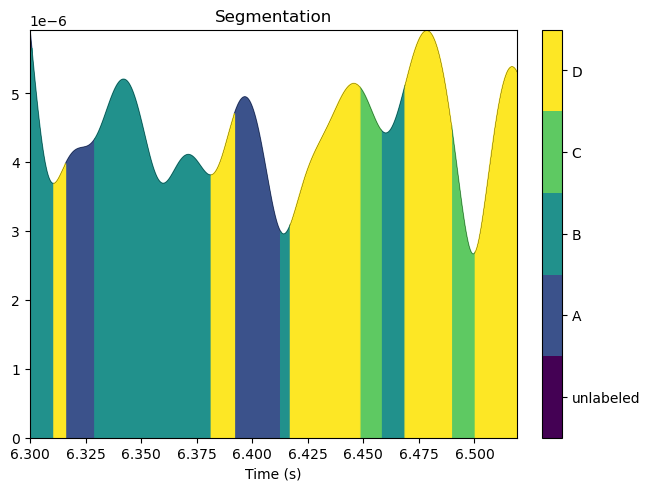

In [81]:
segmentation.plot(tmin=6.3, tmax=6.52)
plt.show()

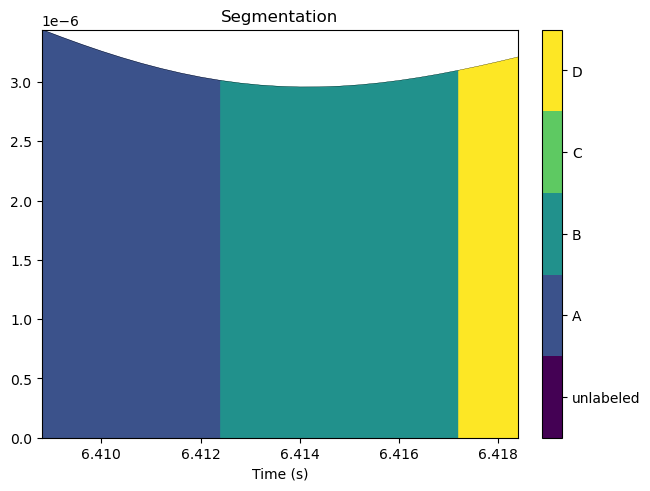

In [66]:
segmentation.plot(tmin=6.4088, tmax=6.4188)
plt.show()

In [82]:
cleaned_eeg.times[19156]

7.6624

In [68]:
cleaned_eeg.times[19301]

7.7204

In [75]:
cleaned_eeg.times[19509]

7.8036

In [69]:
len(cleaned_eeg.times[19301-13:19301+13])

26

In [70]:
cleaned_eeg.times[19301-13:19301+13]

array([7.7152, 7.7156, 7.716 , 7.7164, 7.7168, 7.7172, 7.7176, 7.718 ,
       7.7184, 7.7188, 7.7192, 7.7196, 7.72  , 7.7204, 7.7208, 7.7212,
       7.7216, 7.722 , 7.7224, 7.7228, 7.7232, 7.7236, 7.724 , 7.7244,
       7.7248, 7.7252])

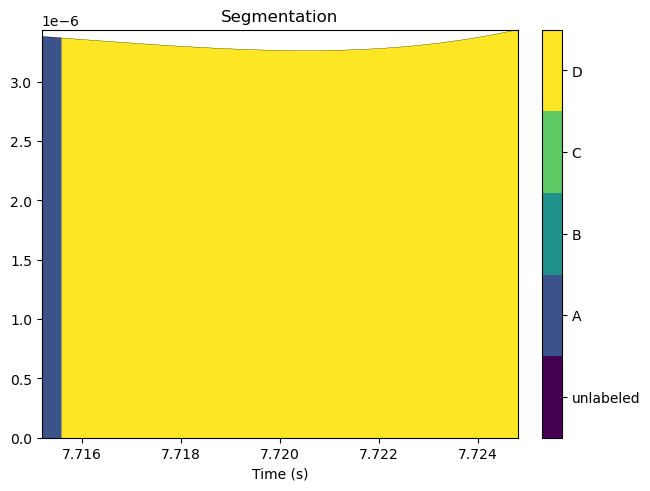

In [71]:
segmentation.plot(tmin=7.7152, tmax=7.7252)
plt.show()

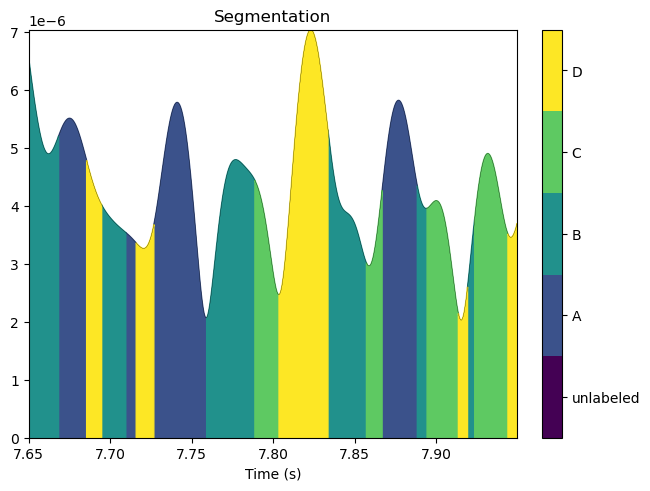

In [74]:
segmentation.plot(tmin=7.65, tmax=7.95)
plt.show()

In [8]:
microstates_df

,microstate;index;event
0,C;200;0
1,A;325;0
2,B;394;0
3,C;513;0
4,B;582;0
...,...
19199,A;2554625;0
19200,D;2554671;0
19201,B;2554755;0
19202,D;2554798;0


In [15]:
transition_dfs

{'A-B':                     0                 1                 2                 3   \
 0    -0.00000311977146  0.00000113580209 -0.00000942234713 -0.00000409828892   
 1    -0.00000303459403  0.00000126401133 -0.00000940412859 -0.00000387775491   
 2    -0.00000295470515  0.00000139372960 -0.00000939076151 -0.00000365764376   
 3    -0.00000288015743  0.00000152479174 -0.00000938214906 -0.00000343835555   
 4    -0.00000281100583  0.00000165699914 -0.00000937820302 -0.00000322021930   
 ...                ...               ...               ...               ...   
 3973  0.00000331339215 -0.00000007152703 -0.00000167657225  0.00000196800871   
 3974  0.00000325121938  0.00000002104534 -0.00000163224139  0.00000206400507   
 3975  0.00000318100304  0.00000011559460 -0.00000159009004  0.00000215958415   
 3976  0.00000310289658  0.00000021194647 -0.00000155012950  0.00000225440666   
 3977  0.00000301696028  0.00000030976955 -0.00000151261420  0.00000234813922   
 
                   

In [20]:
# Define the data directories
DATA_FOLDER = "E:/DATA_FOLDER"  # Replace with your actual data folder path
MICROSTATES = "E:/MICROSTATES"
DATA_PREPROCESS = "E:/sub-126"

# Define the microstate transitions
microstate_transitions = [
    "A-B", "A-C", "A-D", "B-A", "B-C", "B-D",
    "C-A", "C-B", "C-D", "D-A", "D-B", "D-C"
]

# Function to format the dataframe
def format_dataframe(df):
    # Set the display precision to 14 decimal places
    pd.set_option('display.float_format', lambda x: f'{x:.14f}')
    return df.applymap(lambda x: f'{x:.14f}' if isinstance(x, float) else x)

subject = 'sub-010126'

# Recording time required for the preprocessing
t = time.time()

# Construct the full path to the subject folder
subject_path = os.path.join(DATA_FOLDER, subject)

# Check if it's a directory
if os.path.isdir(subject_path):
    # Construct the path to the BrainVision files folder
    rseeg_folder = os.path.join(subject_path, 'RSEEG')
    
    # Check if the RSEEG folder exists
    if os.path.exists(rseeg_folder):

        vhdr_files = [file for file in os.listdir(rseeg_folder) if file.endswith('.vhdr')]
                        
        # Check if a .vhdr file is found
        if vhdr_files:
            
            # Construct the full path to the .vhdr file
            vhdr_path = os.path.join(rseeg_folder, vhdr_files[0])
            
            # Read the BrainVision files
            try:
                raw = mne.io.read_raw_brainvision(vhdr_path, eog=('VEOG',), preload=True, misc='auto', scale=1, verbose=None)
                raw.set_montage("standard_1020")
            except Exception as e:
                print(f"Error reading files for subject {subject}: {e}")

            # PREPROCESSING
            # Cleaning EEG: Filtering and removing (ocular) artifacts
            cleaned_eeg = u.preprocessing(raw)
            data = cleaned_eeg._data
            
            # Dictionary with data
            d = u.dictionary(cleaned_eeg)

            # Samples corresponding to different events between "Closed Eyes" and "Open Eyes"
            start_samples_ce, start_samples_oe, end_samples_ce, end_samples_oe = u.segment_samples(d)

            # Segment division between "Closed Eyes" and "Open Eyes"
            segments_ce = u.division_segments(data, start_samples_ce, end_samples_ce)
            segments_oe = u.division_segments(data, start_samples_oe, end_samples_oe)

            # Segment store in a common list and transformation into a DataFrame
            segments = u.segments_df(cleaned_eeg, segments_ce, segments_oe)

            # Load microstate information
            microstate_file = os.path.join(MICROSTATES, f"{subject}_microstate.csv")
            if not os.path.exists(microstate_file):
                print(f"No microstate file found for subject {subject}.")
            else:
                microstates_df = pd.read_csv(microstate_file, delimiter=';')

                # Create directories for each segment
                for event_id in range(1, 17):
                    event_folder = os.path.join(DATA_PREPROCESS, f"segment_{event_id}")
                    os.makedirs(event_folder, exist_ok=True)

                    # Filter microstate information for the current event
                    event_microstates = microstates_df[microstates_df["event"] == event_id]

                    # Initialize a dictionary to hold dataframes for each transition
                    transition_dfs = {transition: pd.DataFrame() for transition in microstate_transitions}

                    for idx in range(len(event_microstates) - 1):
                        current_state = event_microstates.iloc[idx]["microstate"]
                        next_state = event_microstates.iloc[idx + 1]["microstate"]
                        transition = f"{current_state}-{next_state}"

                        if transition in microstate_transitions:
                            index = event_microstates.iloc[idx + 1]["index"]
                            start_idx = max(0, index - 13)
                            end_idx = min(data.shape[1], index + 13)
                            segment_data = data[:, start_idx:end_idx]
                            segment_df = pd.DataFrame(segment_data.T)

                            # Format the segment dataframe
                            formatted_segment_df = format_dataframe(segment_df)

                            # Append the segment data to the corresponding transition dataframe
                            transition_dfs[transition] = pd.concat([transition_dfs[transition], formatted_segment_df], ignore_index=True)

                    # Save each transition dataframe as a CSV file
                    for transition, df in transition_dfs.items():
                        file_name = f"{subject}_{transition}.csv"
                        file_path = os.path.join(event_folder, file_name)
                        df.to_csv(file_path, index=False, sep='\t', header=False)

                    # Reset the display option to default after concatenation if needed
                    pd.reset_option('display.float_format')

pt = time.time() - t
print('Preprocessing time:', pt)


Extracting parameters from E:/DATA_FOLDER\sub-010126\RSEEG\sub-010126.vhdr...
Setting channel info structure...
Reading 0 ... 2640099  =      0.000 ...  1056.040 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Using EOG channel: VEOG
EOG channel index for this subject is: [16]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Selecting channel VEOG for blink detection
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 20.25 Hz)
- Filter length: 25000 samples (10.000 s)

Now detecting blinks and generating corres

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Found 232 significant peaks
Number of EOG events detected: 232
Not setting metadata
232 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 232 events and 2501 original time points ...
1 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 55.2s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 3 ICA components
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S200', 'Stimulus/S208']
Preprocessing time: 175.6366412639618


In [21]:
import pandas as pd
import os

# Define the path to the file
file_path = r'E:\DATA_PREPROCESSED_MICROSTATES\segment_1\sub-010002_A-B.csv'

# Check if the file exists
if os.path.exists(file_path):
    # Open the file as a DataFrame
    df = pd.read_csv(file_path, delimiter='\t')  # Assuming the delimiter is a tab
else:
    print(f"The file {file_path} does not exist.")


In [22]:
df

,0.00000119115226,0.00000476900682,0.00000470187809,0.00000298602636,0.00000202179757,0.00000214390370,0.00000659838686,0.00000037712446,0.00000127695064,-0.00000190664621,...,0.00000475881441,0.00000161831803,0.00000114898885,-0.00000411380344,-0.00000748546977,0.00000418031294,0.00000204438726,-0.00000138119422,-0.00000753362229,-0.00000979807191
0,1.136207e-06,4.670434e-06,4.534857e-06,0.000003,0.000002,2.182808e-06,6.501938e-06,-4.803730e-09,1.153405e-06,-1.820677e-06,...,0.000005,1.242360e-06,9.295678e-07,-3.858852e-06,-7.022940e-06,0.000004,0.000002,-0.000001,-0.000007,-0.000009
1,1.073550e-06,4.568227e-06,4.354973e-06,0.000003,0.000002,2.220209e-06,6.399678e-06,-3.867168e-07,1.029997e-06,-1.732444e-06,...,0.000005,8.684616e-07,7.133916e-07,-3.599156e-06,-6.552457e-06,0.000004,0.000002,-0.000002,-0.000007,-0.000009
2,1.003424e-06,4.462616e-06,4.162541e-06,0.000003,0.000002,2.256317e-06,6.291976e-06,-7.677080e-07,9.070172e-07,-1.641951e-06,...,0.000005,4.972925e-07,5.007593e-07,-3.335321e-06,-6.075089e-06,0.000004,0.000001,-0.000002,-0.000007,-0.000009
3,9.260167e-07,4.353945e-06,3.958213e-06,0.000003,0.000002,2.291275e-06,6.179068e-06,-1.146897e-06,7.848195e-07,-1.549214e-06,...,0.000005,1.294633e-07,2.919635e-07,-3.067945e-06,-5.591833e-06,0.000004,0.000001,-0.000002,-0.000007,-0.000008
4,8.414764e-07,4.242538e-06,3.742468e-06,0.000002,0.000002,2.324991e-06,6.061182e-06,-1.523498e-06,6.637195e-07,-1.454264e-06,...,0.000006,-2.344521e-07,8.740959e-08,-2.797525e-06,-5.103572e-06,0.000003,0.000001,-0.000002,-0.000007,-0.000008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4674,1.069921e-06,3.151230e-07,-6.877011e-07,-0.000002,-0.000002,-2.316671e-07,-9.070691e-08,-1.341362e-06,-3.621361e-06,-9.263642e-07,...,-0.000002,2.512895e-06,3.061323e-06,7.519848e-08,1.217184e-06,0.000001,0.000003,0.000003,0.000003,0.000003
4675,1.064969e-06,2.665298e-07,-7.295823e-07,-0.000002,-0.000002,-2.429666e-07,-1.006114e-07,-1.239107e-06,-3.597146e-06,-9.008295e-07,...,-0.000002,2.620856e-06,3.149489e-06,3.579849e-08,1.129815e-06,0.000001,0.000003,0.000003,0.000003,0.000003
4676,1.059631e-06,2.177952e-07,-7.741613e-07,-0.000002,-0.000002,-2.537554e-07,-1.123201e-07,-1.136006e-06,-3.573515e-06,-8.752130e-07,...,-0.000002,2.723332e-06,3.232685e-06,7.310000e-12,1.045545e-06,0.000001,0.000003,0.000003,0.000003,0.000003
4677,1.053773e-06,1.689445e-07,-8.213049e-07,-0.000002,-0.000002,-2.640743e-07,-1.259361e-07,-1.032195e-06,-3.550542e-06,-8.495563e-07,...,-0.000002,2.820166e-06,3.310759e-06,-3.191049e-08,9.645756e-07,0.000001,0.000003,0.000003,0.000003,0.000002


In [23]:
4680/26

180.0